In [1]:
import numpy as np
import obspy
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import scipy.signal as signal
import pandas as pd
import matplotlib.dates as dates
import obspy.signal.trigger as trigger
import obspy.signal.filter as filter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import config
from event_pipeline import Event
from obspy.imaging.spectrogram import spectrogram


def import_data(day, starttime, endtime):
    daypaths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=day)
    starttime = obspy.UTCDateTime(starttime)
    endtime = obspy.UTCDateTime(endtime)
    data = load.import_corrected_data_for_single_day(daypaths)
    data.trim(starttime=starttime, endtime=endtime)
    return data

In [49]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    # return (ret[n - 1:] / n)/ret.max()
    return ret[n - 1:] / n

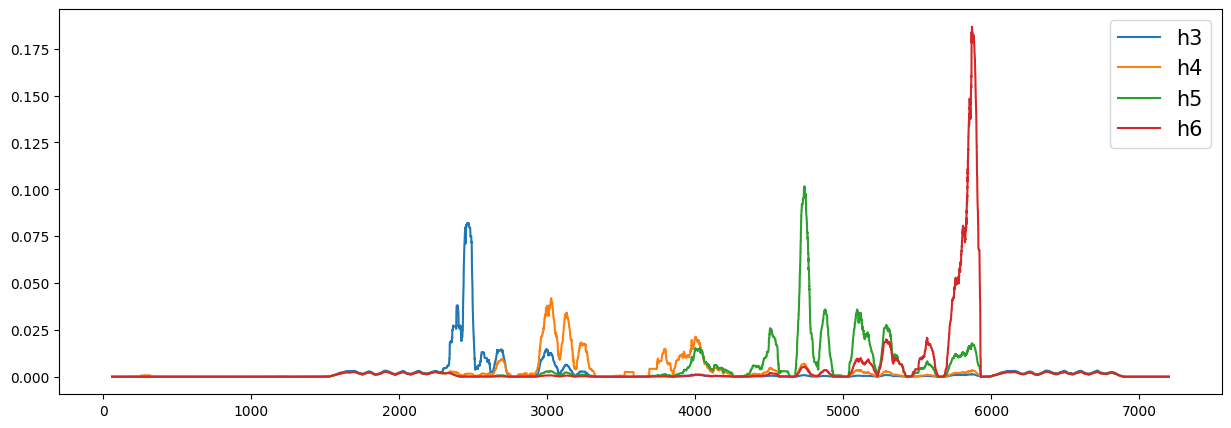

In [50]:
fig, ax = plt.subplots(figsize=(15, 5))

window_size = 1000*60

day141 = import_data(day=141, starttime='2019-05-21T07:00:00.0Z', endtime='2019-05-21T09:00:00.0Z')
day141.filter(type='highpass', freq=50)

ax.plot(day141[2].times()[window_size - 1:], moving_average(day141[2].data**2, n=window_size), label='h3')
ax.plot(day141[3].times()[window_size - 1:], moving_average(day141[3].data**2, n=window_size), label='h4')
ax.plot(day141[4].times()[window_size - 1:], moving_average(day141[4].data**2, n=window_size), label='h5')
ax.plot(day141[5].times()[window_size - 1:], moving_average(day141[5].data**2, n=window_size), label='h6')
ax.legend(fontsize=15)

# ax[0].plot(h5.times(), moving_average(h5.data**2, n=5000))
# ax[0].plot(h6.times(), moving_average(h6.data**2, n=5000), alpha=0.5)

In [ ]:
print('whats going on')